In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'soglia_diodo_decrescente.csv'

from interpolazione import RettaInterpolata, Interpolazione, final_val

In [35]:
fr = pd.read_csv(FILE)
I = np.array(fr['I(uA)']) * 10**(-6)
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = np.array(fr['V'])
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

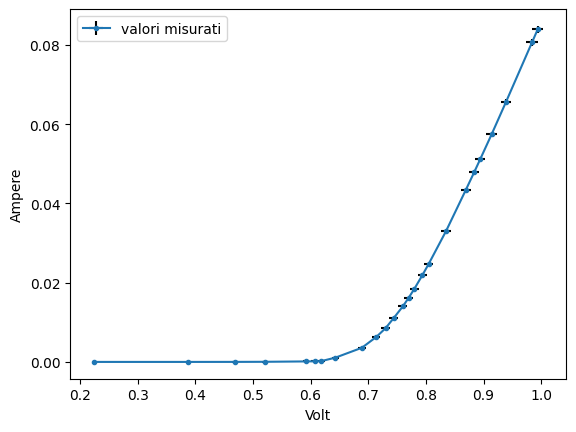

In [36]:
plt.title('')
plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,marker='.',ecolor='black', label='valori misurati')
plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.legend()
plt.show()

In [37]:
def f(V,I0,coeff):
    return (I0 * (np.exp(coeff*V) - 1))

i = Interpolazione(V,I,f,sigmaI,p0=[0.000001,0.5])
# print(i)

### Valore di sogliola

$
X_s = -\frac{A}{B}
$

$
\sigma_{X_s} = \sqrt{\left(\frac{\partial X_s}{\partial A}\right)^2\sigma_A^2 + \left(\frac{\partial X_s}{\partial B}\right)^2\sigma_B^2}
$

$
\frac{\partial X_s}{\partial A} = -\frac{1}{B} \quad \frac{\partial X_s}{\partial B} = \frac{A}{B^2}
$

$
\sigma_{X_s} = \sqrt{\frac{\sigma_A^2}{B^2} + \frac{A^2}{B^4}\sigma_B^2}
$

Valore di sogliola:  0.73 ± 0.01 V


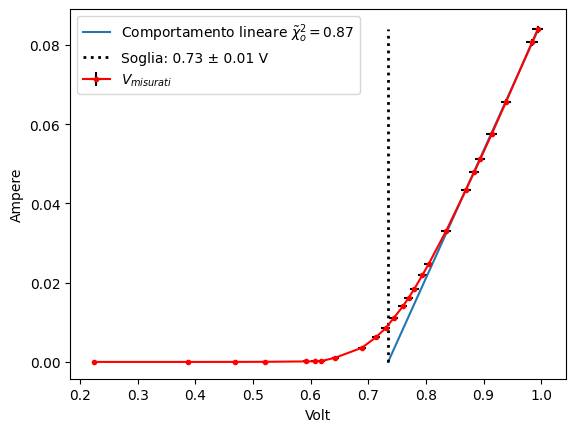


linearità A + BX
    
A: -0.2365304916486405 
B: 0.3220723277983215
sigmaA: 0.003330319254953677
sigmaB: 0.0036373351271087235

sigmaY: [0.0008395  0.00080623 0.0006563  0.00057443 0.00051095 0.0004795
 0.0004334  0.0003304 ]    
chiquadro ridotto: 0.87
df: 6
pvalue: 99.0%


In [41]:
N = 8
r = RettaInterpolata(V[:N],I[:N],sigmaI[:N])

plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,color='red',marker='.',ecolor='black', label='$V_{misurati}$')
# plt.plot(i.x_best,i.y_best, color='palegreen',label='fit')

y = np.linspace(0,I[0],100)
x = (y-r.A)/r.B

# VALORE DI SOGLIOLA
sa,sb = r.sigmaA,r.sigmaB
A,B = r.A,r.B
sogliola = -A/B
ss = np.sqrt(sa**2/B**2 + (A**2/B**4) * sb**2)
print('Valore di sogliola: ',final_val(sogliola,ss,udm='V'))

plt.plot(x,y, label='Comportamento lineare $\\tilde{\chi}_o^2 = 0.87$')

plt.vlines(x=sogliola,ymax=max(I),ymin=0,linewidths=2.0,label="Soglia: 0.73 ± 0.01 V", color='black',linestyle="dotted")

plt.legend()
plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.show()

print(r)